In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
class monty_hall():

    # Setting prize = 1 can be thought of as probability
    def __init__(self, prize = 1, iterations = 100, switch_door = True):
        self.prize = prize
        self.iterations = iterations
        self.moving_expectation = []
        self.switch_door = switch_door

    def compute(self, switch_door):
        wallet = 0
        
        for iter_ in range(1, self.iterations+1):
            
            # 3 doors
            doors = np.arange(3)
            
            # randomly choose door
            choice = np.random.randint(0,3)
            
            # randomly choose correct door
            correct_door = np.random.randint(0,3)
            
            # compute incorrect door
            not_correct = doors[np.where(doors!=correct_door)[0]]
            
            # choose a door to delete that is not the correct door and not the users choice
            door_to_delete = not_correct[np.where(not_correct != choice)[0]][0]
            
            # delete the chosen door
            doors = np.delete(doors, np.where(doors == door_to_delete)[0])

            # switch doors
            if switch_door:
                for c in doors:
                    if c != choice :
                        choice = c
                        break
            
            # if we chose correctly, add the prize to our wallet
            if choice == correct_door:
                wallet += self.prize

            self.moving_expectation.append(wallet/iter_)
            
            
        print("Expecting winning over time:", wallet/self.iterations)
        # return the average winnings 
        return wallet/self.iterations

    def visualise(self):
        plt.plot(self.moving_expectation)
        if self.switch_door:
            title = 'Expectation over time when switching doors'
        else:
            title = 'Expectation over time when not switching doors'
        plt.title(title)
        plt.xlabel('Iterations')
        plt.ylabel('Expectation')
        plt.show()
        

Expecting winning over time: 0.644


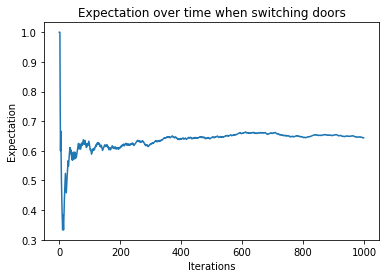

In [87]:
mh = monty_hall(iterations = 1000)
wallet = mh.compute(switch_door = True)
mh.visualise()

Expecting winning over time: 0.336


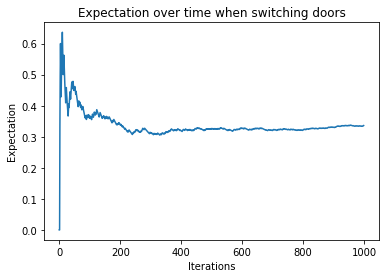

In [98]:
mh = monty_hall(iterations = 1000)
wallet = mh.compute(switch_door = False)
mh.visualise()